In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame()

df["A"] = np.random.randn(1000)
df["B"] = np.random.randn(1000)

In [2]:
df.describe()

,A,B
count,1000.000000,1000.000000
mean,0.008198,-0.078430
std,1.011346,1.021793
min,-3.677298,-3.616530
25%,-0.701765,-0.750160
50%,0.017629,-0.070980
75%,0.691405,0.584082
max,3.234957,2.838215


In [3]:
summa = 0
for i in df["A"]:
    summa += i
ave = summa/len(df["A"])

0.008197890335871184

In [7]:
import math
var = 0
mean = df["A"].mean()
for i in df["A"]:
    var += math.pow((i - mean), 2)
var *= 1/len(df["A"])
math.sqrt(var)

1.0108401354407046

In [8]:
crime = pd.read_csv("crime_maryland.csv")
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89373 entries, 0 to 89372
Data columns (total 26 columns):
Incident ID               89373 non-null int64
Offence Code              89373 non-null object
CR Number                 89373 non-null int64
Dispatch Date/Time        81630 non-null object
NIBRS Code                89373 non-null object
Victims                   89373 non-null int64
Crime Name1               89353 non-null object
Crime Name2               89353 non-null object
Crime Name3               89353 non-null object
Police District Name      89373 non-null object
Block_Address             83715 non-null object
City                      89359 non-null object
State                     89373 non-null object
Zip Code                  89077 non-null float64
Agency                    89373 non-null object
Place                     89373 non-null object
Sector                    86356 non-null object
Beat                      89196 non-null object
PRA                       893

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
crime["NIBRS Code"].head()

0    23H
1    23C
2    520
3    90J
4    13A
Name: NIBRS Code, dtype: object

In [12]:
print([method for method in dir(crime) if "_" not in method])

['Agency', 'Beat', 'Latitude', 'Location', 'Longitude', 'PRA', 'Place', 'Sector', 'State', 'T', 'Victims', 'abs', 'add', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at', 'axes', 'bfill', 'bool', 'boxplot', 'clip', 'columns', 'combine', 'compound', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'dropna', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'eval', 'ewm', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'floordiv', 'ftypes', 'ge', 'get', 'groupby', 'gt', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'info', 'insert', 'interpolate', 'isin', 'isna', 'isnull', 'items', 'iteritems', 'iterrows', 'itertuples', 'ix', 'join', 'keys', 'kurt', 'kurtosis', 'last', 'le', 'loc', 'lookup', 'lt', 'mad', 'mask', 'max', 'mean', 'median', 'melt', 'merge', 'min', 'mod', 'mode', 'mul', 'multiply', 'ndim', 'ne', 'nlargest',

In [33]:
len(crime[crime["Victims"] < 4]) 

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
89343    True
89344    True
89345    True
89346    True
89347    True
89348    True
89349    True
89350    True
89351    True
89352    True
89353    True
89354    True
89355    True
89356    True
89357    True
89358    True
89359    True
89360    True
89361    True
89362    True
89363    True
89364    True
89365    True
89366    True
89367    True
89368    True
89369    True
89370    True
89371    True
89372    True
Name: Victims, Length: 89373, dtype: bool

In [13]:
import inspect, functools, itertools, dis

In [16]:
dir(functools)

['MappingProxyType',
 'RLock',
 'WRAPPER_ASSIGNMENTS',
 'WRAPPER_UPDATES',
 'WeakKeyDictionary',
 '_CacheInfo',
 '_HashedSeq',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_c3_merge',
 '_c3_mro',
 '_compose_mro',
 '_convert',
 '_find_impl',
 '_ge_from_gt',
 '_ge_from_le',
 '_ge_from_lt',
 '_gt_from_ge',
 '_gt_from_le',
 '_gt_from_lt',
 '_le_from_ge',
 '_le_from_gt',
 '_le_from_lt',
 '_lru_cache_wrapper',
 '_lt_from_ge',
 '_lt_from_gt',
 '_lt_from_le',
 '_make_key',
 'cmp_to_key',
 'get_cache_token',
 'lru_cache',
 'namedtuple',
 'partial',
 'partialmethod',
 'recursive_repr',
 'reduce',
 'singledispatch',
 'total_ordering',
 'update_wrapper',
 'wraps']

In [24]:
@functools.lru_cache(maxsize=3)
def fib(n):
    if n == 1:
        return 1
    if n == 0:
        return 1
    else:
        return fib(n-1) + fib(n-2)
fib(400)

284812298108489611757988937681460995615380088782304890986477195645969271404032323901

In [40]:
from functools import partial
violent_crimes = ["720", "200", "13A", 
           "13B", "13C", "09A", 
           "09B", "09C", "64A",
          "64B", "100", "11A", 
          "11C"]

def is_code(codes: list, x: pd.DataFrame) -> pd.DataFrame:
    return any([code == x["NIBRS Code"] 
                for code in codes])
        
is_violent = partial(is_code, violent_crimes)
crime["is_violent"] = crime.apply(is_violent, axis=1)
violent_crime = crime[crime["is_violent"]]

In [43]:
violent_crime["Victims"].describe()

count    7391.000000
mean        1.208903
std         0.575486
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        22.000000
Name: Victims, dtype: float64

In [44]:
crime["Victims"].describe()

count    89373.000000
mean         1.019950
std          0.191966
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: Victims, dtype: float64

In [46]:
non_violent_crime = crime[crime["is_violent"]  == False]

In [47]:
non_violent_crime["Victims"].describe()

count    81982.000000
mean         1.002915
std          0.082524
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: Victims, dtype: float64

(array([0.        , 0.83152763, 0.14395991, 0.01747021, 0.00704225]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

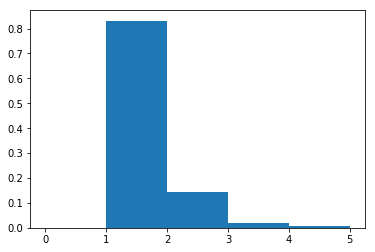

In [53]:
bins = list(range(0,6))
plt.hist(violent_crime["Victims"], bins=bins, density=True)

(array([0.00000000e+00, 9.98023860e-01, 1.57359292e-03, 2.56166289e-04,
        1.46380736e-04]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

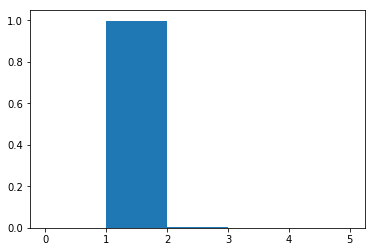

In [54]:
bins = list(range(0, 6))
plt.hist(non_violent_crime["Victims"], bins=bins, density=True)

https://en.wikipedia.org/wiki/Moment-generating_function

https://en.wikipedia.org/wiki/Normal_distribution - this has it's own moment generating function

https://en.wikipedia.org/wiki/Poisson_distribution - this one does too

https://en.wikipedia.org/wiki/List_of_probability_distributions



We've talked about the first few moments - mean and standard deviation.  But there are quiet a few more.  

For continuous distributions there are infinitely many descriptive statistics, generated by the moment generating function!!!



The 3rd and 4th moment are called skew and kurtosis respectively and tell us extra information about the shape of our distribution:

* skew - how "left" skew or "right" skew the data is with respect to the mean - https://www.siyavula.com/read/maths/grade-11/statistics/11-statistics-05

* kurtosis - how "fat" the tails of the distribution are (how many outliers there are).